In [1]:
import pandas as pd
import numpy as np

data = {
    'Date': ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07'],
    'Temperature': [22.5, 23.1, np.nan, 24.0, 24.5, 22.3, 25.0],
    'Humidity': [45, 47, 50, 46, np.nan, 48, 45],
    'WindSpeed': [10.5, 9.8, 9.2, 10.0, 9.5, 10.3, np.nan]
}


df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

# Show the DataFrame
df


,Date,Temperature,Humidity,WindSpeed
0,2025-01-01,22.5,45.0,10.5
1,2025-01-02,23.1,47.0,9.8
2,2025-01-03,NaN,50.0,9.2
3,2025-01-04,24.0,46.0,10.0
4,2025-01-05,24.5,NaN,9.5
5,2025-01-06,22.3,48.0,10.3
6,2025-01-07,25.0,45.0,NaN


In [2]:
df['Temperature'].fillna(method='ffill', inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)
df['WindSpeed'].interpolate(method='linear', inplace=True)

df

<ipython-input-2-cc7dc8b4e0db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(method='ffill', inplace=True)
<ipython-input-2-cc7dc8b4e0db>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperature'].fillna(method='ffill', inplace=True)
<ipython-input-2-cc7dc8b4e0db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

,Date,Temperature,Humidity,WindSpeed
0,2025-01-01,22.5,45.000000,10.5
1,2025-01-02,23.1,47.000000,9.8
2,2025-01-03,23.1,50.000000,9.2
3,2025-01-04,24.0,46.000000,10.0
4,2025-01-05,24.5,46.833333,9.5
5,2025-01-06,22.3,48.000000,10.3
6,2025-01-07,25.0,45.000000,10.3


In [3]:
df.drop_duplicates(subset=['Date'], keep='last', inplace=True)

In [4]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['Temperature', 'Humidity', 'WindSpeed']]))
df_outliers_removed = df[(z_scores < 3).all(axis=1)]

df_outliers_removed


,Date,Temperature,Humidity,WindSpeed
0,2025-01-01,22.5,45.000000,10.5
1,2025-01-02,23.1,47.000000,9.8
2,2025-01-03,23.1,50.000000,9.2
3,2025-01-04,24.0,46.000000,10.0
4,2025-01-05,24.5,46.833333,9.5
5,2025-01-06,22.3,48.000000,10.3
6,2025-01-07,25.0,45.000000,10.3


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Temperature', 'Humidity', 'WindSpeed']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'WindSpeed']])

df[['Temperature', 'Humidity', 'WindSpeed']]

,Temperature,Humidity,WindSpeed
0,0.074074,0.000000,1.000000
1,0.296296,0.400000,0.461538
2,0.296296,1.000000,0.000000
3,0.629630,0.200000,0.615385
4,0.814815,0.366667,0.230769
5,0.000000,0.600000,0.846154
6,1.000000,0.000000,0.846154


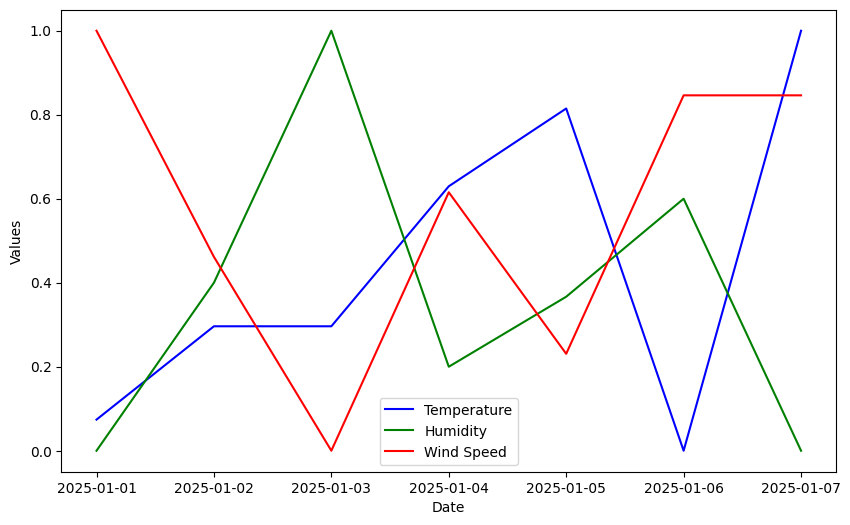

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Temperature
plt.plot(df['Date'], df['Temperature'], label='Temperature', color='blue')

# Plot Humidity
plt.plot(df['Date'], df['Humidity'], label='Humidity', color='green')

# Plot WindSpeed
plt.plot(df['Date'], df['WindSpeed'], label='Wind Speed', color='red')

# Labeling the axes
plt.xlabel('Date')
plt.ylabel('Values')

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()


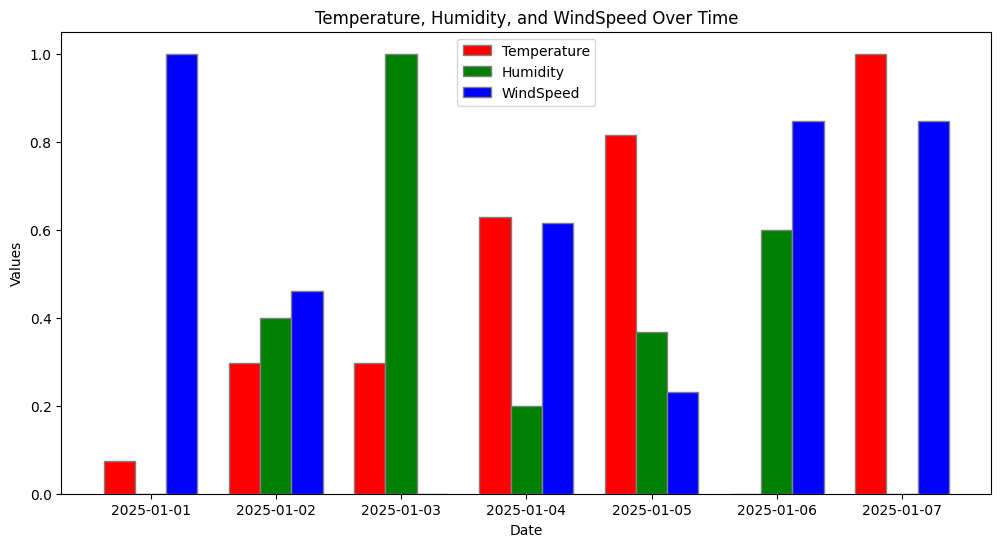

In [9]:
import matplotlib.pyplot as plt
bar_width = 0.25

r1 = range(len(df['Date']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, df['Temperature'], color='red', width=bar_width, edgecolor='grey', label='Temperature')
plt.bar(r2, df['Humidity'], color='green', width=bar_width, edgecolor='grey', label='Humidity')
plt.bar(r3, df['WindSpeed'], color='blue', width=bar_width, edgecolor='grey', label='WindSpeed')

plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks([r + bar_width for r in range(len(df['Date']))], df['Date'].dt.strftime('%Y-%m-%d'))
plt.title('Temperature, Humidity, and WindSpeed Over Time')
plt.legend()

plt.show()

<ipython-input-10-d3c54d194dc7>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([df['Temperature'], df['Humidity'], df['WindSpeed']],


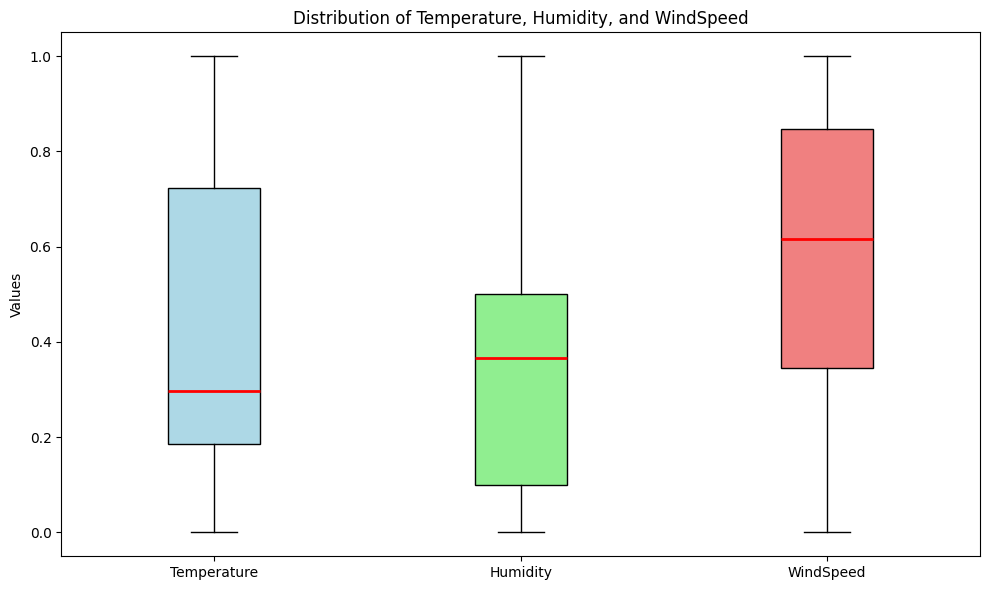

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

box_colors = ['lightblue', 'lightgreen', 'lightcoral']  # Define box colors

# Create box plots, setting facecolor individually for each box
# Change vert to True for vertical orientation
bp = plt.boxplot([df['Temperature'], df['Humidity'], df['WindSpeed']],
            vert=True, patch_artist=True,
            labels=['Temperature', 'Humidity', 'WindSpeed'],
            boxprops=dict(color='black'),  # Set common box properties
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'))

# Set facecolor for each box individually
for box, color in zip(bp['boxes'], box_colors):
    box.set_facecolor(color)

plt.ylabel('Values')  # Change xlabel to ylabel for vertical orientation
plt.title('Distribution of Temperature, Humidity, and WindSpeed')
plt.tight_layout()
plt.show()

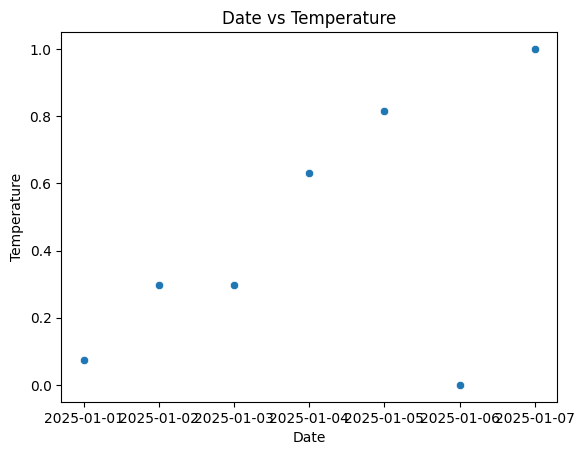

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Date'], y=df['Temperature'])
plt.title("Date vs Temperature")
plt.show()
